## Examen 3

1) Determine el espacio de configuraciones: es decir, con todas las condiciones iniciales posibles, en los ejes $(x,v)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$. $x$ es la posicion y $v$ velocidad.




2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

##1

Para un resorte de $0.2Kg$ de constante elastica $k=1N/m$ determinar el espacio de fase $(x,v)$

La ecuacion de movimiento de un resorte con una masa es

$$m\ddot{x}=-kx$$

que podemos reescribir como

$$m\ddot{x}+kx=0$$

sea $z=\dot{x}$, y $U=\begin{pmatrix} x\\z \end{pmatrix}$

entonces reescribimos la ecuacion de movimiento como:

$$m\dot{z}+kx=0 \\ \dot{z}=\frac{-kx}{m}$$

Entonces:

$$\dot{U}=\begin{pmatrix} z \\ \frac{-kx}{m} \end{pmatrix}=\begin{pmatrix}  U_1 \\ -\frac{k}{m} U_0   \end{pmatrix}$$

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
k=1 #N/m
m=0.2 #Kg
def Udot(U,t):
  return [ U[1],
          -(k/m)*U[0]]

In [3]:
#variemos las posibles condiciones iniciales
np.random.seed(1000307065)
x0=np.random.uniform(-1,1,100)
v0=np.random.uniform(-2*np.pi,2*np.pi,100)
t=np.linspace(0,20,100)

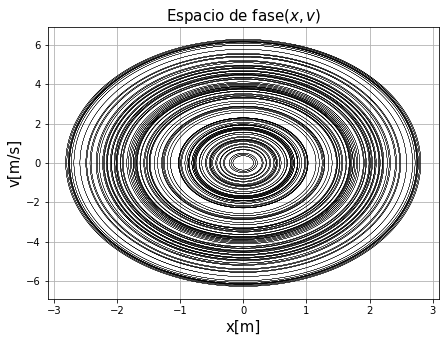

In [4]:
#variemos las posibles condiciones iniciales
np.random.seed(1000307065)
N=10000
x0=np.random.uniform(-1,1,N)
v0=np.random.uniform(-2*np.pi,2*np.pi,N)
t=np.linspace(0,20,N)
#construyamos el grafico
i=0
plt.figure(figsize=(7,5))
for x0,v0 in zip(x0,v0):
  U0=[x0,v0]
  Us=integrate.odeint(Udot,U0,t)
  plt.plot(Us[:,0], Us[:,1], lw=0.1,color= 'black')
  if i==100:
    break
  i=i+1
plt.title("Espacio de fase$(x,v)$",fontsize=15)
plt.xlabel("x[m]", fontsize=15)
plt.ylabel("v[m/s]",fontsize=15)
plt.grid()
plt.show()


##2

In [5]:
import pandas as pd
from scipy.optimize import curve_fit

In [6]:
#leamos el archivo
df=pd.DataFrame(pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json"))

In [7]:
#definamos la funcion de decaimiento
def f(t,N0,λ):
  return N0*np.exp(-λ*t)

In [8]:
#hacemos un fit a los puntos
N,ΔN=curve_fit(f,df['t'],df['N(t)'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
ΔN

array([[1.34310233e+02, 3.25783544e-03],
       [3.25783544e-03, 2.09515051e-07]])

In [10]:
#sacamos el error estandar a ΔN
σ=np.sqrt(np.diag(ΔN))

La vida media se define como

$$\tau=\frac{\mathrm{ln}(2)}{\lambda}$$

Sabemos que el error propagado se define como:

$$\sigma_{\tau}=\sqrt{(\frac{\partial\tau}{\partial{\lambda}})^{2}\sigma_{\lambda^{2}}}=\sqrt{(\frac{-\mathrm{ln}(2)}{\lambda})^{2}\sigma_{\lambda}^{2}}$$

entonces:

$$\sigma_{\tau}=\frac{\mathrm{ln(2)}}{\lambda}\sigma_{\lambda}$$

In [11]:
print(f"la vida media:τ=({round(np.log(2)/N[1],2)} ± {round((np.log(2))/N[1]*σ[1],2)}) años")

la vida media:τ=(27.64 ± 0.01) años


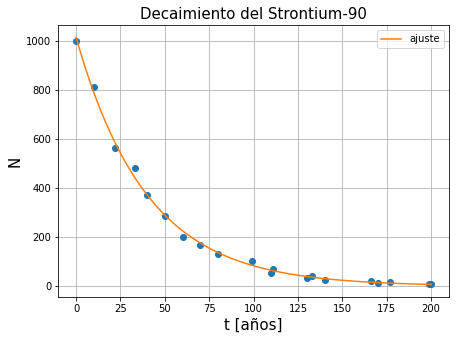

In [12]:
t=np.linspace(0,200,1000)
plt.figure(figsize=(7,5))
plt.title("Decaimiento del Strontium-90",fontsize=15)
plt.plot(df['t'],df['N(t)'],'o')
plt.plot(t,f(t,N[0],N[1]),label="ajuste")
plt.xlabel("t [años]",fontsize=15)
plt.ylabel("N",fontsize=15)
plt.legend()
plt.grid()
plt.show()
